# Titanic EDA

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/grpb datasets/titanic_data.csv'
titanic_data= pd.read_csv(file_path)
titanic_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
font = {
    'weight' : 'bold',
    'size'   : 22
}

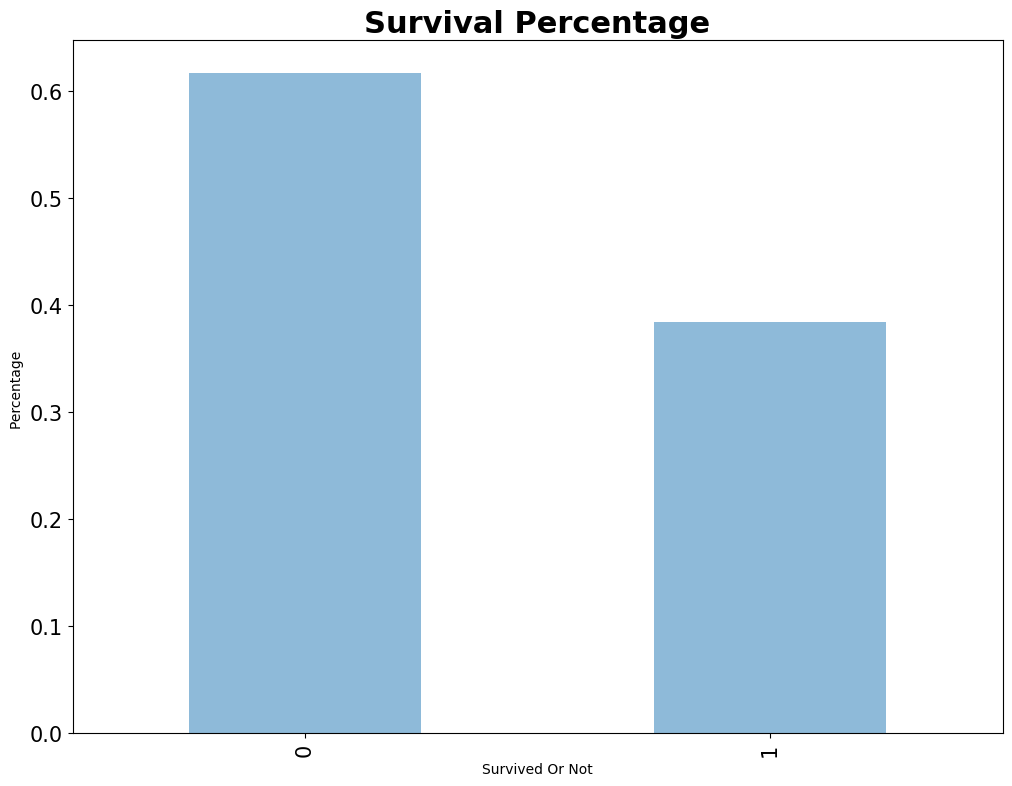

In [10]:
plt.figure(figsize=(12,9))
titanic_data['Survived'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Survived Or Not')
plt.ylabel('Percentage ')
plt.title("Survival Percentage", fontdict=font)
# plt.legend(loc='best')
plt.savefig('Survival.png')
plt.show()

In [11]:
import numpy as np


In [12]:
titanic_data.isnull().any()

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


In [13]:
print("age",titanic_data.Age.isna().sum())
print("cabin",titanic_data.Cabin.isna().sum())
print("embark",titanic_data.Embarked.isna().sum())

age 177
cabin 687
embark 2


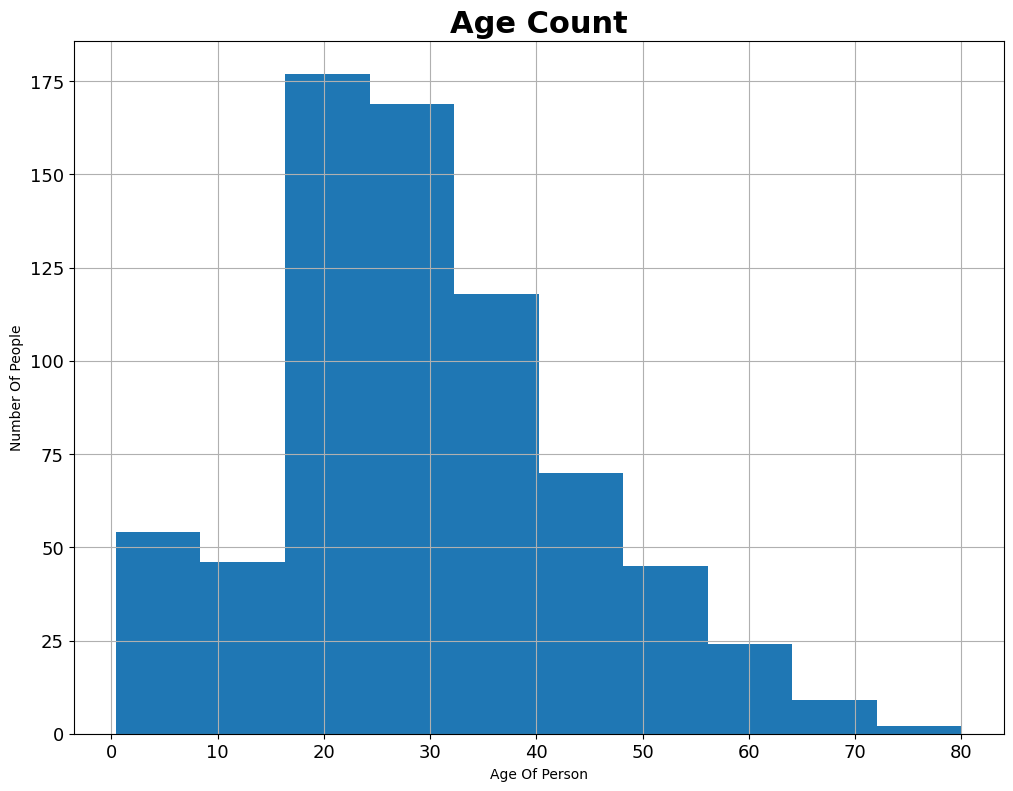

In [14]:
plt.figure(figsize=(12,9))
titanic_data.Age.hist()
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Age Of Person')
plt.ylabel('Number Of People')
plt.title("Age Count", fontdict=font)
# plt.legend(loc='best')
plt.savefig('Age.png')
plt.show()


In [15]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


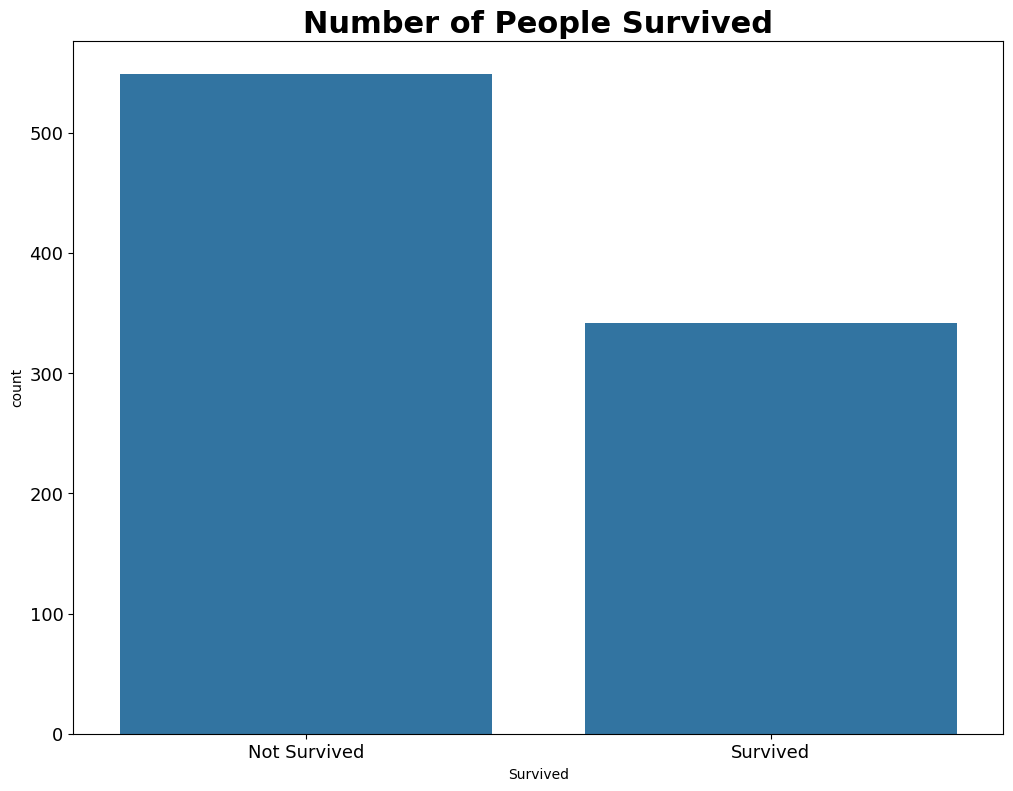

In [16]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived',data=titanic_data)
label=['Not Survived','Survived']
plt.xticks(titanic_data['Survived'].unique(), label, size=13)
plt.yticks(size=13)
plt.title("Number of People Survived", fontdict=font)
plt.savefig('survived_people.png')
plt.show()


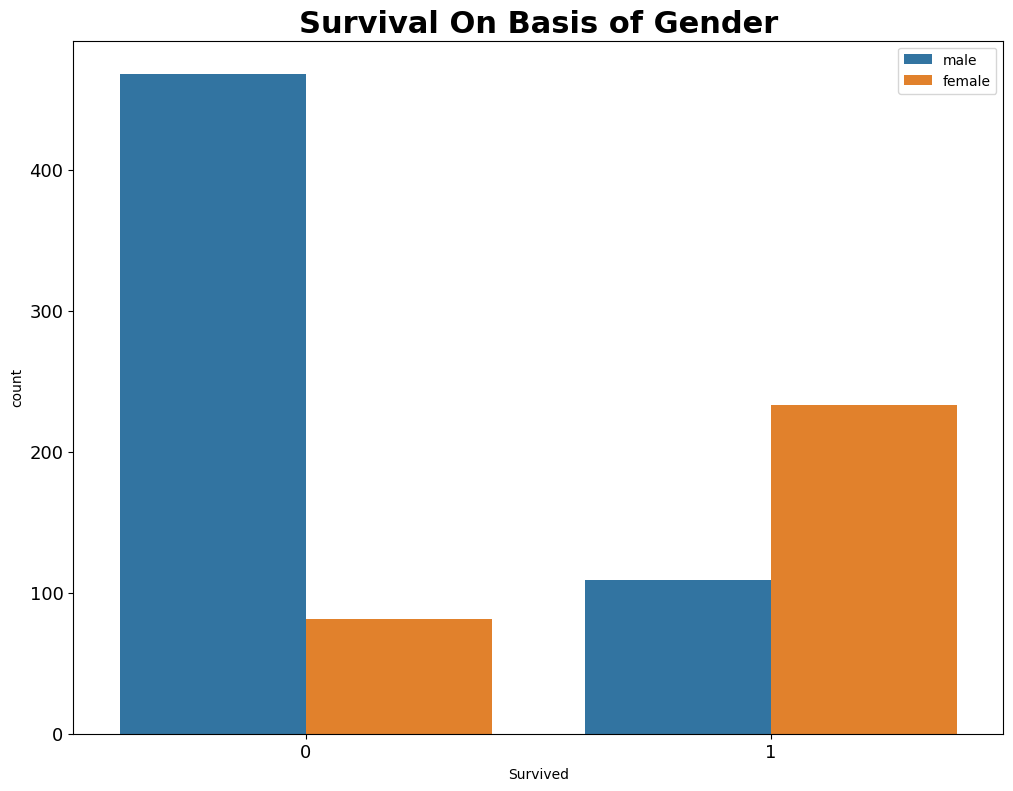

In [17]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived',hue='Sex',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Gender", fontdict=font)
plt.legend(loc='best')
plt.savefig('Survival_gender.png')
plt.show()


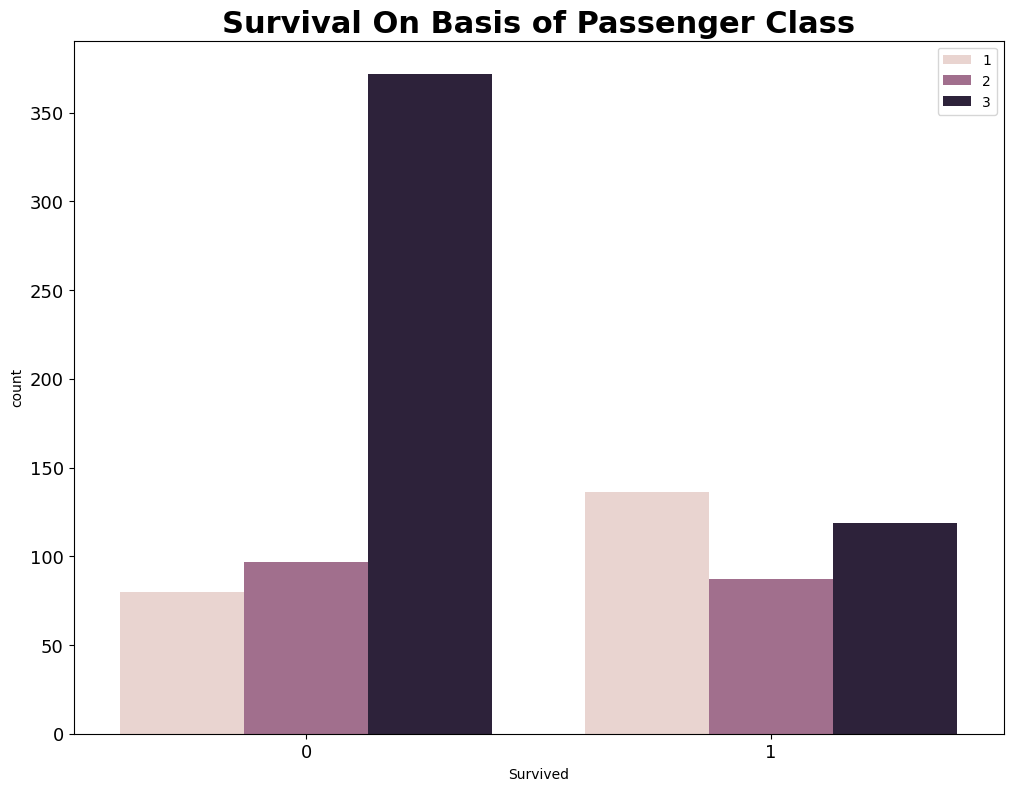

In [18]:
plt.figure(figsize=(12,9))

sns.countplot(x='Survived',hue='Pclass',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Passenger Class", fontdict=font)
plt.legend(loc='best')
plt.savefig('Survival_Pclass.png')
plt.show()


<Axes: ylabel='Frequency'>

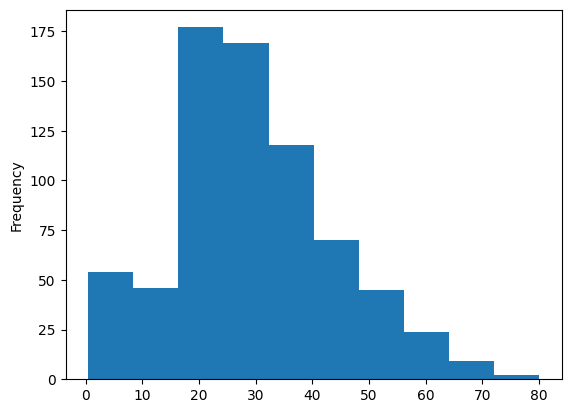

In [19]:
titanic_data['Age'].plot.hist()

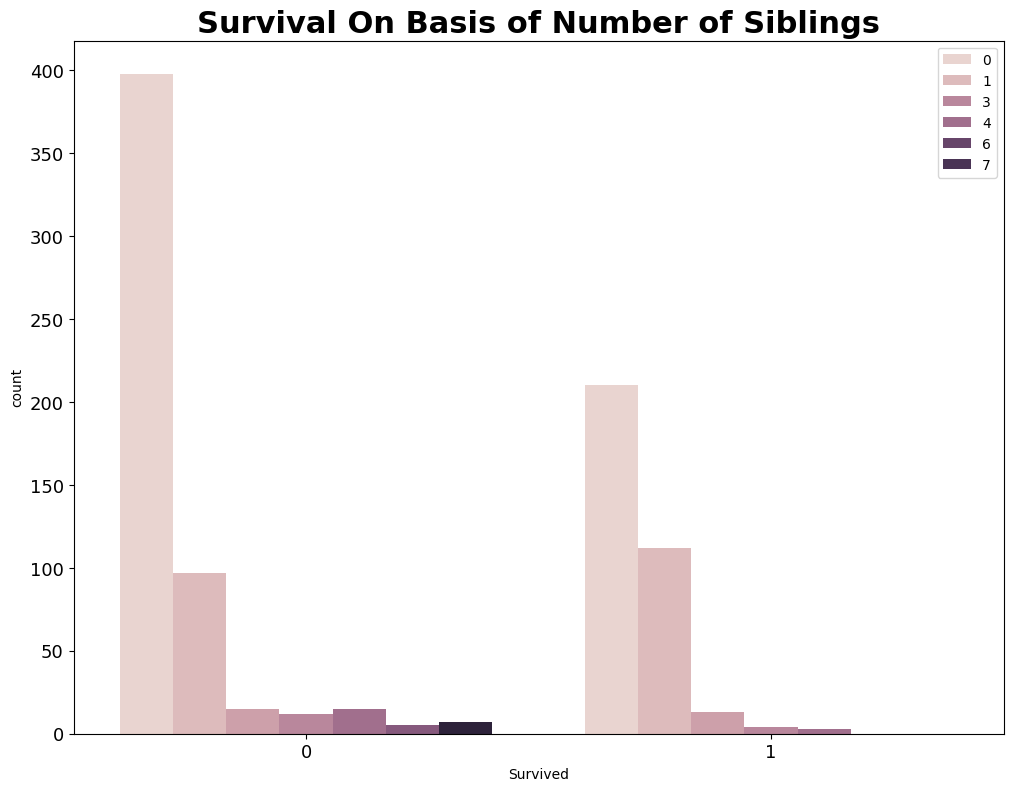

In [20]:
plt.figure(figsize=(12,9))


sns.countplot(x='Survived',hue='SibSp',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Number of Siblings", fontdict=font)
plt.legend(loc='best')
plt.savefig('Survival_sibling.png')
plt.show()


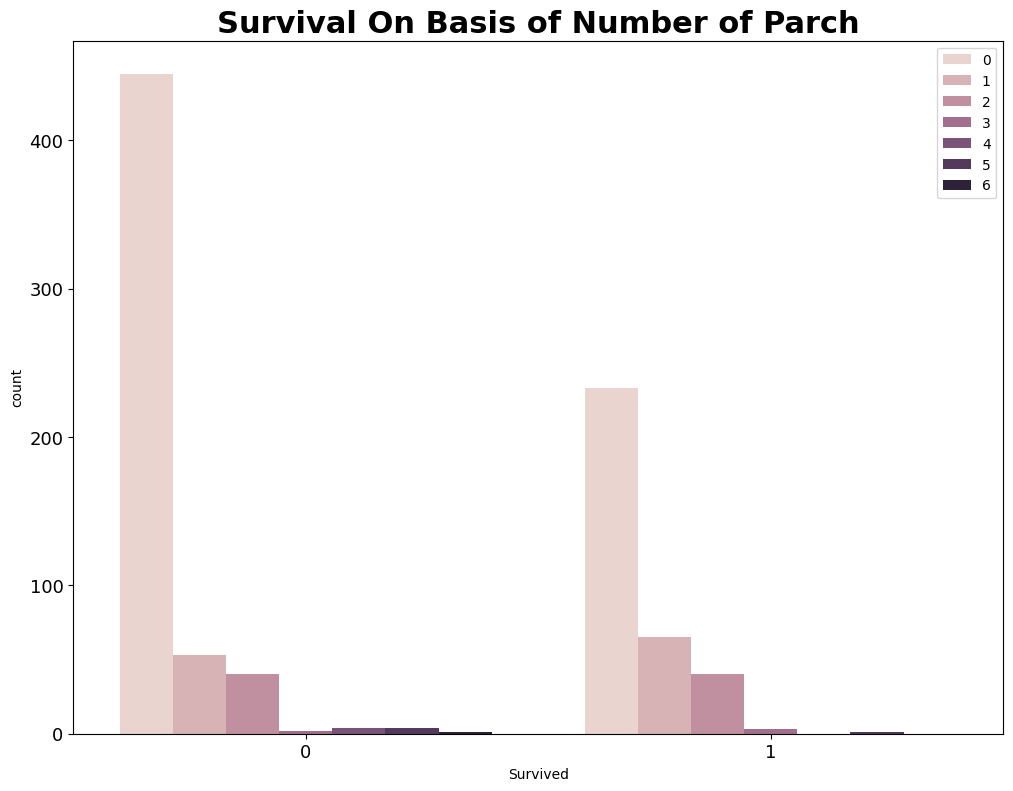

In [21]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived',hue='Parch',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Number of Parch", fontdict=font)
plt.legend(loc='best')
plt.savefig('Survival_parch.png')
plt.show()


## Data Cleaning

In [22]:
titanic_data.isnull().any()

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


In [23]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [25]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
titanic_data.dropna(inplace=True)

In [27]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [28]:
Sex=pd.get_dummies(titanic_data['Sex'])
Sex.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [29]:
Passengerclass=pd.get_dummies(titanic_data['Pclass'])
Passengerclass.head()

,1,2,3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


In [30]:
Embark=pd.get_dummies(titanic_data['Embarked'])
Embark.head()

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [31]:
titanic_data=pd.concat([titanic_data,Sex,Passengerclass,Embark],axis=1)

In [32]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,1,2,3,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,True,False,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,False,True,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,True,False,False,False,True,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,False,True,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,True,False,False,True,False,False,True


In [33]:
titanic_data.drop(['PassengerId','Pclass','Name','Ticket','Embarked','Sex'],axis=1,inplace=True)

In [34]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,female,male,1,2,3,C,Q,S
0,0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,1,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,1,35.0,1,0,53.1000,True,False,True,False,False,False,False,True
4,0,35.0,0,0,8.0500,False,True,False,False,True,False,False,True


# Applying Logistic Regression Model to Predict the Survival of Passenger

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
X,Y=titanic_data.drop(['Survived','C','Q','S','male'],axis=1),titanic_data.Survived

In [37]:
X.head()

,Age,SibSp,Parch,Fare,female,1,2,3
0,22.0,1,0,7.2500,False,False,False,True
1,38.0,1,0,71.2833,True,True,False,False
2,26.0,0,0,7.9250,True,False,False,True
3,35.0,1,0,53.1000,True,True,False,False
4,35.0,0,0,8.0500,False,False,False,True


In [38]:
X.shape[0]

712

In [39]:
Y.shape[0]

712

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [41]:
model=LogisticRegression()

In [42]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [43]:
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
prediction=model.predict(x_test)

In [45]:
prediction

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [46]:
print(x_test[:3])

[[24.0 0 0 69.3 True True False False]
 [54.0 1 0 78.2667 True True False False]
 [52.0 1 1 79.65 False True False False]]


In [47]:
dataf=[456,24.0,1,1,67.3400,0,0,0,0,0]

In [48]:
testing=pd.DataFrame(dataf)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:

acc_logreg = round(accuracy_score(prediction, y_test) * 100, 2)
print(acc_logreg)

80.42


In [51]:
test= x_test
file_path1 = '/content/drive/My Drive/Colab Notebooks/grpb datasets/test.csv'
test= pd.read_csv(file_path1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
X.head()

,Age,SibSp,Parch,Fare,female,1,2,3
0,22.0,1,0,7.2500,False,False,False,True
1,38.0,1,0,71.2833,True,True,False,False
2,26.0,0,0,7.9250,True,False,False,True
3,35.0,1,0,53.1000,True,True,False,False
4,35.0,0,0,8.0500,False,False,False,True


In [53]:
clean_test = test[['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Pclass', 'Embarked']]
clean_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex,Pclass,Embarked
0,892,34.5,0,0,7.8292,male,3,Q
1,893,47.0,1,0,7.0000,female,3,S
2,894,62.0,0,0,9.6875,male,2,Q
3,895,27.0,0,0,8.6625,male,3,S
4,896,22.0,1,1,12.2875,female,3,S


In [54]:
cleaning = pd.get_dummies(clean_test[['Sex', 'Pclass', 'Embarked']])
cleaning

,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,False,True,False,True,False
1,3,True,False,False,False,True
2,2,False,True,False,True,False
3,3,False,True,False,False,True
4,3,True,False,False,False,True
...,...,...,...,...,...,...
413,3,False,True,False,False,True
414,1,True,False,True,False,False
415,3,False,True,False,False,True
416,3,False,True,False,False,True


In [55]:
class_dummies = pd.get_dummies(clean_test['Pclass'])
class_dummies.head()

,1,2,3
0,False,False,True
1,False,False,True
2,False,True,False
3,False,False,True
4,False,False,True


In [56]:
dummies = pd.concat([class_dummies, cleaning], axis=1)
dummies.head()

,1,2,3,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True,3,False,True,False,True,False
1,False,False,True,3,True,False,False,False,True
2,False,True,False,2,False,True,False,True,False
3,False,False,True,3,False,True,False,False,True
4,False,False,True,3,True,False,False,False,True


In [57]:
dummies.shape

(418, 9)

In [58]:
clean_test = pd.concat([clean_test, dummies], axis=1)
clean_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex,Pclass,Embarked,1,2,3,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,male,3,Q,False,False,True,3,False,True,False,True,False
1,893,47.0,1,0,7.0000,female,3,S,False,False,True,3,True,False,False,False,True
2,894,62.0,0,0,9.6875,male,2,Q,False,True,False,2,False,True,False,True,False
3,895,27.0,0,0,8.6625,male,3,S,False,False,True,3,False,True,False,False,True
4,896,22.0,1,1,12.2875,female,3,S,False,False,True,3,True,False,False,False,True


In [59]:
clean_test.shape

(418, 17)

In [60]:
X.head(2)

,Age,SibSp,Parch,Fare,female,1,2,3
0,22.0,1,0,7.2500,False,False,False,True
1,38.0,1,0,71.2833,True,True,False,False


In [61]:
clean_test.drop(columns=['Sex', 'Pclass', 'Embarked', 'Pclass'], axis=1, inplace=True)
clean_test.head()

,PassengerId,Age,SibSp,Parch,Fare,1,2,3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,False,False,True,False,True,False,True,False
1,893,47.0,1,0,7.0000,False,False,True,True,False,False,False,True
2,894,62.0,0,0,9.6875,False,True,False,False,True,False,True,False
3,895,27.0,0,0,8.6625,False,False,True,False,True,False,False,True
4,896,22.0,1,1,12.2875,False,False,True,True,False,False,False,True


In [62]:
X.head()

,Age,SibSp,Parch,Fare,female,1,2,3
0,22.0,1,0,7.2500,False,False,False,True
1,38.0,1,0,71.2833,True,True,False,False
2,26.0,0,0,7.9250,True,False,False,True
3,35.0,1,0,53.1000,True,True,False,False
4,35.0,0,0,8.0500,False,False,False,True


In [63]:
X.shape[1]

8

In [64]:
clean_test.shape[1]

13

In [65]:
X.head(2)

,Age,SibSp,Parch,Fare,female,1,2,3
0,22.0,1,0,7.2500,False,False,False,True
1,38.0,1,0,71.2833,True,True,False,False


In [66]:
clean_test.drop(columns=['PassengerId'], axis=1, inplace=True)
clean_test.head()

,Age,SibSp,Parch,Fare,1,2,3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,False,False,True,False,True,False,True,False
1,47.0,1,0,7.0000,False,False,True,True,False,False,False,True
2,62.0,0,0,9.6875,False,True,False,False,True,False,True,False
3,27.0,0,0,8.6625,False,False,True,False,True,False,False,True
4,22.0,1,1,12.2875,False,False,True,True,False,False,False,True


In [67]:
clean_test.isnull().any()

,0
Age,True
SibSp,False
Parch,False
Fare,True
1,False
2,False
3,False
Sex_female,False
Sex_male,False
Embarked_C,False


In [68]:
clean_test.Age = clean_test.Age.fillna(titanic_data['Age'].mean())

In [69]:
clean_test.Fare = clean_test.Fare.fillna(titanic_data['Fare'].mean())

In [70]:
clean_test.isnull().any()

,0
Age,False
SibSp,False
Parch,False
Fare,False
1,False
2,False
3,False
Sex_female,False
Sex_male,False
Embarked_C,False


In [71]:
clean_test.head()

,Age,SibSp,Parch,Fare,1,2,3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,False,False,True,False,True,False,True,False
1,47.0,1,0,7.0000,False,False,True,True,False,False,False,True
2,62.0,0,0,9.6875,False,True,False,False,True,False,True,False
3,27.0,0,0,8.6625,False,False,True,False,True,False,False,True
4,22.0,1,1,12.2875,False,False,True,True,False,False,False,True


In [72]:
new_data=clean_test.drop(['Embarked_C','Embarked_Q','Embarked_S','Sex_male'],axis=1)

In [73]:
new_data.head()
new_data=new_data.to_numpy()

In [74]:
final_prediction = model.predict(new_data)


In [75]:
final_prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,